In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/apr_26-30.csv')
dft.head()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-26,1254200490394607618,India crosses 26k Covid-19 cases with biggest ...,[],0.0,{'country_code': 'in'},india crosses covid cases biggest day spike,0
1,2020-04-26,1254201371169116160,Keep Socially Distancing \n#SocialDistancing #...,"['SocialDistancing', 'SoSociallyDistant']",0.0,"{'country_code': 'in', 'county': 'Khaltsi'}",keep socially distancing socialdistancing soso...,0
2,2020-04-26,1254202078576033792,What do all of these roads have in common? \n\...,['SeeAustralia'],2.0,{'country_code': 'in'},roads common ? answer ! road trip post covid b...,1
3,2020-04-26,1254206576401027079,ONLY WEDDING &amp; PARTYWEAR GOWNS\n100% Origi...,"['india', 'unitedkingdom', 'denmark', 'maleshi...",0.0,{'country_code': 'in'},wedding partywear gowns original gaurnteed res...,1
4,2020-04-26,1254208325337653249,"Mashallah TABREZ,more muslims who have been cu...",[],3767.0,{'country_code': 'in'},mashallah tabrez muslims cured covid must come...,-1


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(411413, 8)


,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-26,1254200490394607618,India crosses 26k Covid-19 cases with biggest ...,[],0.0,{'country_code': 'in'},india crosses covid cases biggest day spike,0
1,2020-04-26,1254201371169116160,Keep Socially Distancing \n#SocialDistancing #...,"['SocialDistancing', 'SoSociallyDistant']",0.0,"{'country_code': 'in', 'county': 'Khaltsi'}",keep socially distancing socialdistancing soso...,0
2,2020-04-26,1254202078576033792,What do all of these roads have in common? \n\...,['SeeAustralia'],2.0,{'country_code': 'in'},roads common ? answer ! road trip post covid b...,1
3,2020-04-26,1254206576401027079,ONLY WEDDING &amp; PARTYWEAR GOWNS\n100% Origi...,"['india', 'unitedkingdom', 'denmark', 'maleshi...",0.0,{'country_code': 'in'},wedding partywear gowns original gaurnteed res...,1
4,2020-04-26,1254208325337653249,"Mashallah TABREZ,more muslims who have been cu...",[],3767.0,{'country_code': 'in'},mashallah tabrez muslims cured covid must come...,-1


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
411408,2020-04-30,1255740552391331843,India needs to spend around Rs 650 bn to help ...,[],0.0,"{'country_code': 'in', 'state': 'Delhi'}",india needs spend around rs bn help poor vulne...,-1
411409,2020-04-30,1255773068900757504,@bhupeshbaghel @narendramodi @pmoindia I don't...,"['COVID19', 'India']",1.0,{'country_code': 'in'},know states people going like used lockdown wi...,1
411410,2020-04-30,1255734377184559104,Follow these self-care tips for a diabetic per...,"['SarojSuperSpecialityHospital', 'Healthcare',...",0.0,"{'country_code': 'in', 'state': 'Delhi'}",follow self care tips diabetic person family c...,1
411411,2020-04-30,1255675704844279808,@RT_com Keep American Corona,[],0.0,"{'country_code': 'in', 'state': 'Rajasthan', ...",com keep american corona,0
411412,2020-04-30,1255963191151976448,For those looking for remote jobs due to the c...,[],1.0,"{'country_code': 'in', 'state': 'Jammu and Ka...",looking remote jobs due covid pandemic reason ...,1


In [ ]:
print(df.shape)
df.isnull().sum()

(411413, 8)


date             0
id               0
text             0
hashtags         7
retweet_count    7
location         7
cleaned          0
sentiment        0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0          india crosses covid cases biggest day spike
1    keep socially distancing socialdistancing soso...
2    roads common  answer  road trip post covid buc...
3    wedding partywear gowns original gaurnteed res...
4    mashallah tabrez muslims cured covid must come...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

411413


'india crosses covid cases biggest day spike'

In [ ]:
#Lemmatization
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.568590402603149 secs.


In [ ]:
t_clean[0]

['india', 'cross', 'covid', 'case', 'big', 'day', 'spike']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

india


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

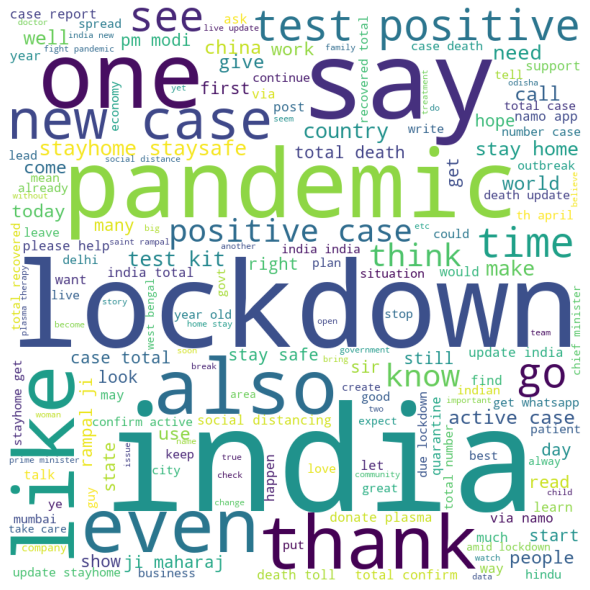

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['india cross covid case big day spike',
 'keep socially distance socialdistancing sosociallydistant',
 'road common answer road trip post covid bucket list know australia look like seeaustralia',
 'wed partywear gown original gaurnteed resaler welcome buy whatsapp india unitedkingdom denmark maleshiya myanmar singapore unitedstates',
 'mashallah tabrez muslim cure covid must come forward save life pain needle prick covid plasma donor share experience']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['aarogya setu',
 'across country',
 'across globe',
 'across india',
 'across world',
 'action take',
 'active case',
 'active case cure',
 'active case total',
 'adopt satbhakti',
 'adopt satbhakti make',
 'affect lockdown',
 'affect lockdown many',
 'aim trueworship',
 'aim trueworship good',
 'airline read',
 'airline read britishairwaysrefund',
 'akshaya tritiya',
 'also give',
 'americanairline travelocat',
 'americanairline travelocat airlinerefund',
 'amid crisis',
 'amid lockdown',
 'amid outbreak',
 'amid pandemic',
 'amidst lockdown',
 'amidst pandemic',
 'ampinity news',
 'andhra pradesh',
 'anti venom',
 'antibody test',
 'antibody test kit',
 'april pm',
 'april th',
 'around world',
 'arrangement make',
 'arrangement make distribute',
 'asharamji bapu',
 'ask question',
 'ayushmanbharatlootyogana due',
 'ayushmanbharatlootyogana due china',
 'baap hai',
 'baap hai indiacheakmateschina',
 'back home',
 'back normal',
 'banevm covided',
 'banevm covided ahmedabad',
 'bank 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:new case,positive case,case report,total case,total number,case death,number case,prime minister,year old,fight pandemic\nTopic 1:test positive,west bengal,plasma therapy,rahul gandhi,global pandemic,full refund,every day,back home,day lockdown,death due\nTopic 2:stayhome staysafe,migrant worker,last hour,chief minister,pandemic situation,red zone,whole world,daily wager,economic impact,come back\nTopic 3:active case,total death,update india,case total,total confirm,india total,update stayhome,active case total,total recovered,recovered total\nTopic 4:rishi kapoor,bring back,time pandemic,carrier trump,lockdown lockdown,britishairwaysrefund americanairline travelocat,britishairwaysrefund americanairline,travelocat airlinerefund,read britishairwaysrefund,read britishairwaysrefund americanairline\nTopic 5:namo app,via namo,via namo app,social distancing,pm modi,wear mask,work home,save life,day day,post lockdown\nTopic 6:please help,new york,tamil nadu,look like,many people,sant

In [ ]:
lda.perplexity(tf)

463.4628294980093

In [ ]:
f=open('lda_apr_26-30.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_apr_26-30.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_apr_26-30.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_apr_26-30.pk')
shutil.move("topics_apr_26-30.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_apr_26-30.txt')